# Local Thresholding
In this notebook, I extract orbits for a signle chromosome in all 4 cell lines, using a
different method of thresholding.
In order to do this, I slide a kernel of size k 
through each pixel and check if it has a 
particular property. If the property is satisified, then the pixel is set to 1,
otherwise it is set to 0. 
The two properties that I experiment with are *maximum thresholding* and *normal 
thresholding*.
1. **Maximum Thresholding**: in max thresholding, if the pixel is the maximum of its 
neighbors with respect to the kernel, then it is set.

```python
def local_threshold(mat, k=1, method='max', t=1):
    mat2 = np.zeros_like(mat)
    n, m = mat.shape
    if isinstance(k, tuple):
        k1, k2 = k
    else:
        k1 = k2 = k
    for i in range(k1, n-k1):
        for j in range(k, m-k2):
            if method == 'max':
                condition = mat[i, j] == np.max(mat[i-k1:i+k1, j-k2:j+k2])
            elif method=='normal':
                temp = mat[i-k1:i+k1, j-k2:j+k2]
                condition = mat[i, j] >= np.mean(temp) + t * np.std(temp)
            elif method = 'max_linear':
                condition = mat[i, j] == np.max(mat[i, j-k1:j+k2])
            if condition:
                mat2[i, j] = 1
    return mat2
```
2. **Normal Thresholding**: in normal thresholding, if the pixel is larger that the 
average of the neighbors then it is set.

In [1]:
import numpy as np
import cv2
from utility import *
import matplotlib.pyplot as plt
from iced import normalization
from iced import filter
import os
%load_ext autoreload
%autoreload 2
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)

Populating the interactive namespace from numpy and matplotlib


/home/bzr0014/watson/scripts/virt/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors', 'log']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Initiating matrices

In [2]:
chr1 = 1
chr2 = chr1
print "chromosome 1: %s, chromosome 2: %s"%(chr1, chr2)
#print observed_mit_original.shape
mit_original = readYamlIntensities\
('../data/GM12878_primary/500kb_resolution_intrachromosomal/chr%d/MAPQG0/chr%d_500kb.RAWobserved'\
 %(chr1, chr1), 500000)

mit = readMat("../data/extracted_all_contact_MIT/chr_%02d_%02d_500kb.mat"%\
              (chr1, chr2), "\t")
call4 = readMat("../data/extracted_all_contact_call4/chr_%02d_%02d_500kb.mat"%\
                (chr1, chr2), "\t")
rl = readMat("../data/extracted_all_contact_RL/chr_%02d_%02d_500kb.mat"%(chr1, chr2), "\t")

all = readMat("../data/extracted_all_contact_ALL/chr_%02d_%02d_500kb.mat"%(chr1, chr2), "\t")

#There are some blank rows and columns in the matrix. let's remove them.
blankRows4, blankCols4 = getBlankRowsAndColumns(mit_original)
blankRows0, blankCols0 = getBlankRowsAndColumns(mit)
blankRows1, blankCols1 = getBlankRowsAndColumns(all)
blankRows2, blankCols2 = getBlankRowsAndColumns(rl)
blankRows3, blankCols3 = getBlankRowsAndColumns(call4)
blankRows = Set([])
blankCols = Set([])
blankRows.update(blankRows0)
blankRows.update(blankRows1)
blankRows.update(blankRows2)
blankRows.update(blankRows3)
blankRows.update(blankRows4)
blankCols.update(blankCols0)
blankCols.update(blankCols1)
blankCols.update(blankCols2)
blankCols.update(blankCols3)
blankCols.update(blankCols4)
mit_original = removeRowsAndColumns(mit_original, blankRows, blankCols)
mit = removeRowsAndColumns(mit, blankRows, blankCols)
all = removeRowsAndColumns(all, blankRows, blankCols)
rl = removeRowsAndColumns(rl, blankRows, blankCols)
call4 = removeRowsAndColumns(call4, blankRows, blankCols)

chromosome 1: 1, chromosome 2: 1
file directory: ../data/extracted_all_contact_MIT/chr_01_01_500kb.mat
file directory: ../data/extracted_all_contact_call4/chr_01_01_500kb.mat
file directory: ../data/extracted_all_contact_RL/chr_01_01_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_01_01_500kb.mat
size of old matrix: (499, 499)
size of new matrix: (456, 456)
size of old matrix: (495, 495)
size of new matrix: (452, 452)
size of old matrix: (495, 495)
size of new matrix: (452, 452)
size of old matrix: (495, 495)
size of new matrix: (452, 452)
size of old matrix: (495, 495)
size of new matrix: (452, 452)


### Comparing MIT with the Rao et al high-resolution data:

In [12]:
pylab.rcParams['figure.figsize'] = (15, 20)
k = (2, 2, 2, 2)
method = 'max'
t = 0
params = None
symmetric=True
call4_os = local_threshold(((call4+1+1e-5)), k = k, method=method, t = t, params=params, symmetric=symmetric)
rl_os = local_threshold(((rl+1+1e-5)), k = k, method=method, t = t, params=params, symmetric=symmetric)
n1, m1 = call4_os.shape
n2, m2 = rl_os.shape
n = np.min([n1, n2])
m = np.min([m1, m2])
call4_os = call4_os[:n, :m]
call4 = call4[:n, :m]
rl_os = rl_os[:n, :m]
rl = rl[:n, :m]
a = ((call4_os * call4) > 0) * 1
b = ((rl_os * rl) > 0) * 1


(2, 2, 2, 2)
(2, 2, 2, 2)


Number of columnts: 3


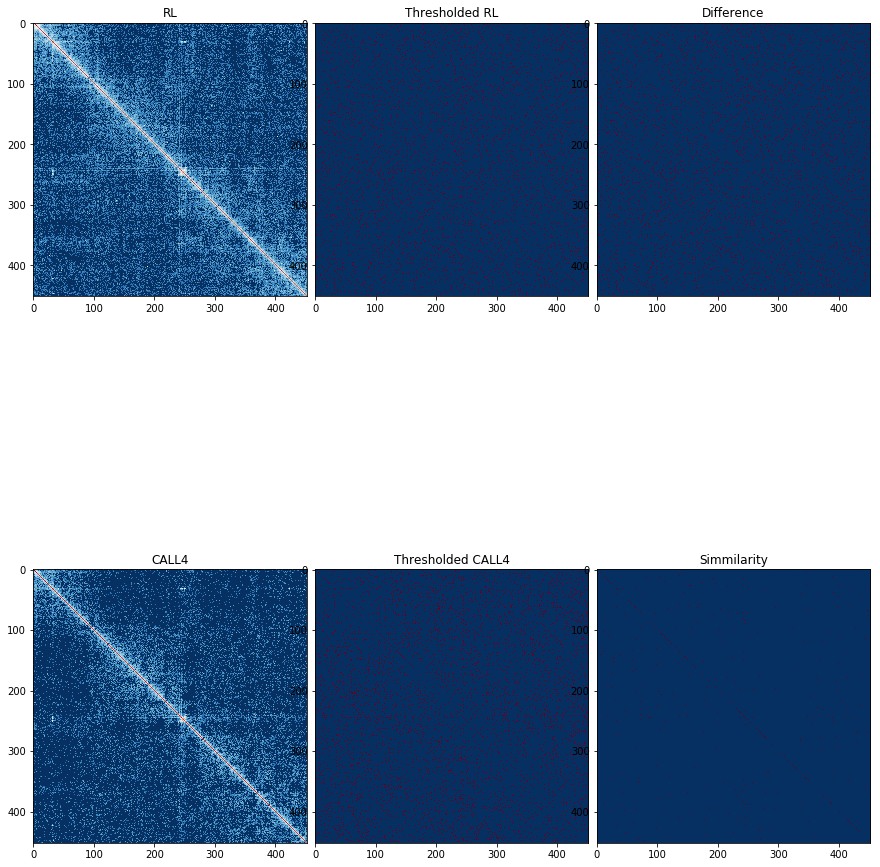

In [17]:
images = [ rl, a, (a-b) > 0, call4,  b, a * b ]
titles = ['RL', 'Thresholded RL', 'Difference', 'CALL4', 'Thresholded CALL4', 'Simmilarity']
showImages(images, 2, titles=titles)

Number of columnts: 2


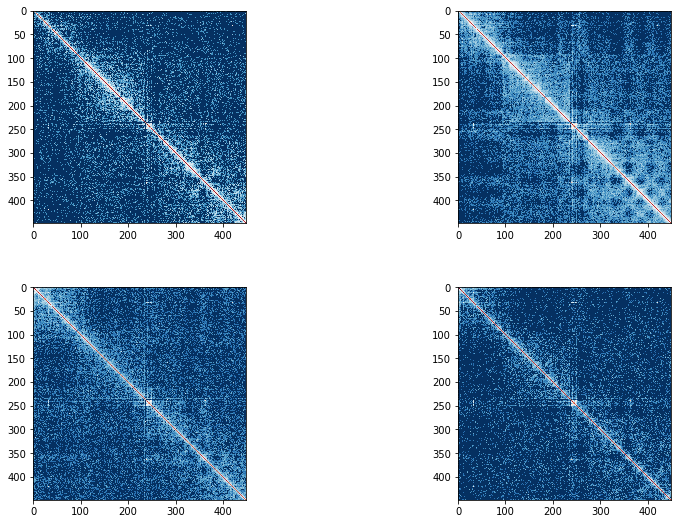

In [22]:
pylab.rcParams['figure.figsize'] = (15, 9)

n0, m0 = np.shape(mit)
n1, m1 = np.shape(call4)
n2, m2 = np.shape(rl)
n3, m3 = np.shape(all)

n = np.min([n0, m0, n1, m1, n2, m2, n3, m3])

images = [mit, all, rl, call4]
showImages(images, 2)

In [28]:
k = (0, 0, 3, 0)
mit = local_threshold((mit), k = k, method='normal', t = 1) 
all = local_threshold((all), k = k, method='normal', t = 1)
rl = local_threshold((rl), k = k, method='normal', t = 1) 
call4 = local_threshold((call4), k = k, method='normal', t = 1) 


(0, 0, 3, 0)
(0, 0, 3, 0)
(0, 0, 3, 0)
(0, 0, 3, 0)


Number of columnts: 2


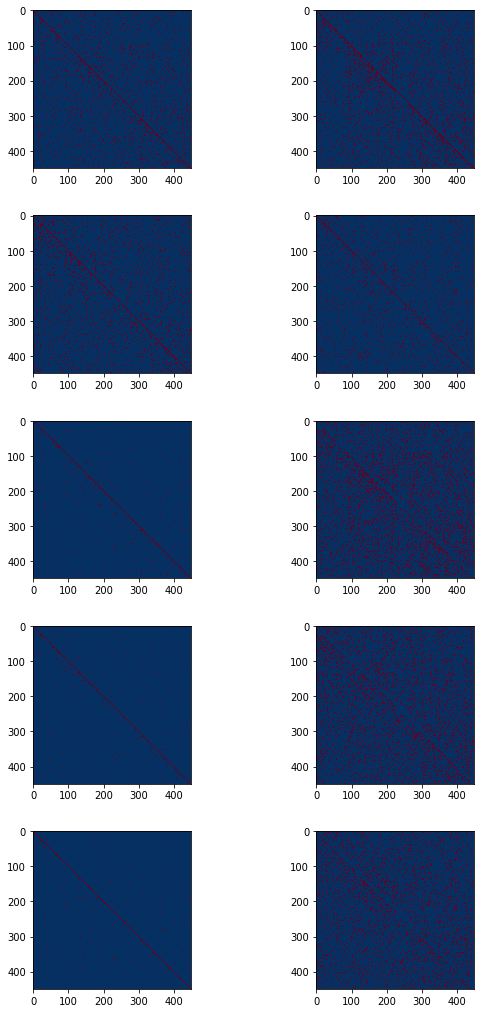

In [29]:
pylab.rcParams['figure.figsize'] = (10, 18)
images = [ 
        mit, all, rl, call4
        , (mit == all) * (mit != 0) * (all != 0) , all != mit
        , (mit == rl) * (mit != 0) * (rl != 0) , rl != mit
        , (mit == call4) * (mit != 0) * (call4 != 0) , call4 != mit
         ] 
showImages(images, 5)

In [22]:
min, max, mean_mit, std_mit = print_statistics(mit, "mit")
min, max, mean_rl, std_rl = print_statistics(rl, "rl")
min, max, mean_call4, std_call4 = print_statistics(call4, "call4")
min, max, mean_all, std_all = print_statistics(all, "all")

#-----------------------------------------------------------------------#
Stats for mit: 
max: 1.000000 | min: 0.000000 | median: 0.000000 | mean: 0.188247 | std: 0.390909
#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#
Stats for rl: 
max: 1.000000 | min: 0.000000 | median: 0.000000 | mean: 0.153229 | std: 0.360208
#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#
Stats for call4: 
max: 1.000000 | min: 0.000000 | median: 0.000000 | mean: 0.158854 | std: 0.365540
#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#
Stats for all: 
max: 1.000000 | min: 0.000000 | median: 0.000000 | mean: 0.159688 | std: 0.366316
#-----------------------------------------------------------------------#


Number of columnts: 4


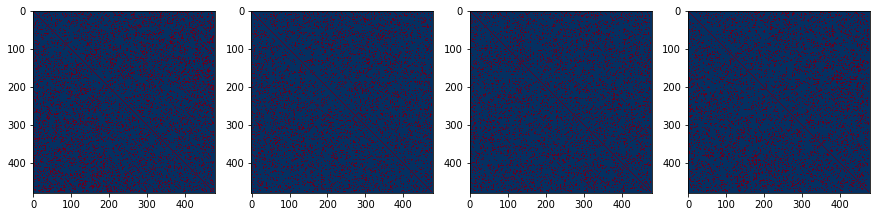

In [23]:
pylab.rcParams['figure.figsize'] = (15, 9)
images = [
        (mit) > 1e-2
        , (all) > 1e-2
        , (rl) > 1e-2
        , (call4) > 1e-2
        ]
showImages(images, 1)

Number of columnts: 4


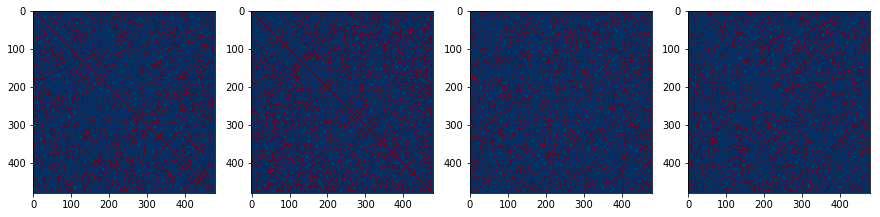

In [24]:
images = [
        log(call4+1)
        , log(mit+1)
        , log(rl+1)
        , log(all+1)
        ]
showImages(images, 1)

In [10]:
convertBinaryMatToOrcaReadable(call4 > 0, "data/chr%02d_chr%02d_call4.edges"%(chr1, chr1))
convertBinaryMatToOrcaReadable(mit > 0, "data/chr%02d_chr%02d_mit.edges"%(chr1, chr1))
convertBinaryMatToOrcaReadable(rl > 0, "data/chr%02d_chr%02d_rl.edges"%(chr1, chr1))
convertBinaryMatToOrcaReadable(all > 0, "data/chr%02d_chr%02d_all.edges"%(chr1, chr1))

The following is the implementation of the above procedure for all 24 chromosomes:

chromosome 1: 1, chromosome 2: 1
file directory: ../data/extracted_all_contact_MIT/chr_01_01_500kb.mat
file directory: ../data/extracted_all_contact_call4/chr_01_01_500kb.mat
file directory: ../data/extracted_all_contact_RL/chr_01_01_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_01_01_500kb.mat
size of old matrix: (495, 495)
size of new matrix: (455, 455)
size of old matrix: (495, 495)
size of new matrix: (455, 455)
size of old matrix: (495, 495)
size of new matrix: (455, 455)
size of old matrix: (495, 495)
size of new matrix: (455, 455)
Number of columnts: 4


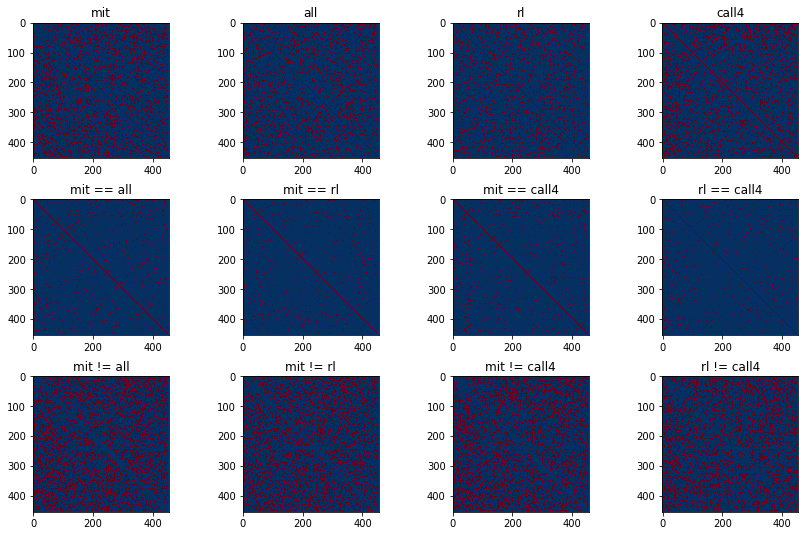

chromosome 1: 2, chromosome 2: 2
file directory: ../data/extracted_all_contact_MIT/chr_02_02_500kb.mat
file directory: ../data/extracted_all_contact_call4/chr_02_02_500kb.mat
file directory: ../data/extracted_all_contact_RL/chr_02_02_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_02_02_500kb.mat
size of old matrix: (486, 486)
size of new matrix: (480, 480)
size of old matrix: (486, 486)
size of new matrix: (480, 480)
size of old matrix: (486, 486)
size of new matrix: (480, 480)
size of old matrix: (486, 486)
size of new matrix: (480, 480)
Number of columnts: 4


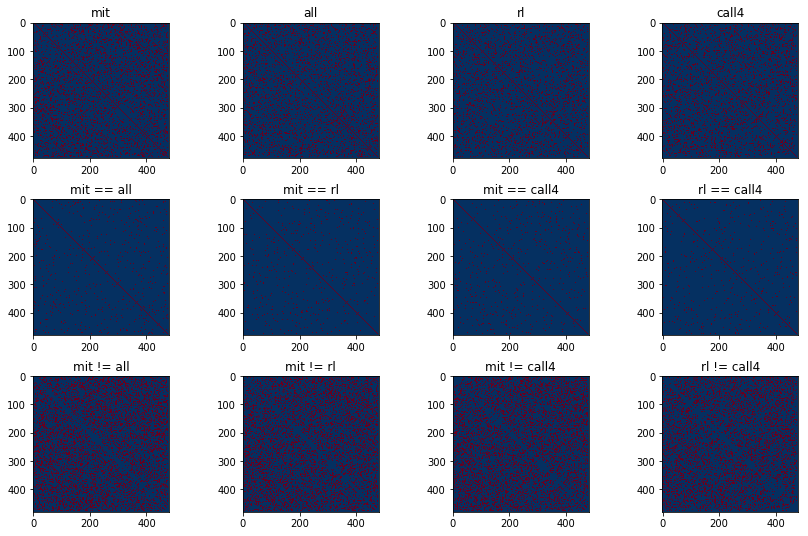

chromosome 1: 3, chromosome 2: 3
file directory: ../data/extracted_all_contact_MIT/chr_03_03_500kb.mat
file directory: ../data/extracted_all_contact_call4/chr_03_03_500kb.mat
file directory: ../data/extracted_all_contact_RL/chr_03_03_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_03_03_500kb.mat
size of old matrix: (399, 399)
size of new matrix: (392, 392)
size of old matrix: (399, 399)
size of new matrix: (392, 392)
size of old matrix: (399, 399)
size of new matrix: (392, 392)
size of old matrix: (399, 399)
size of new matrix: (392, 392)
Number of columnts: 4


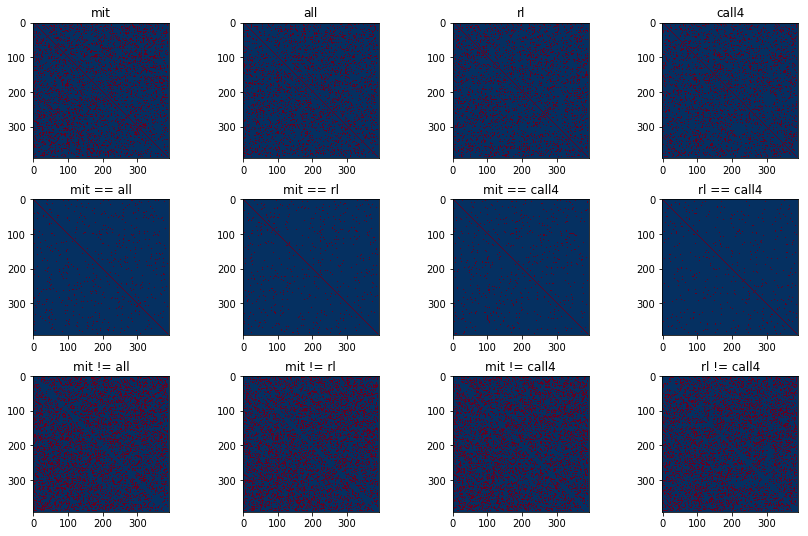

chromosome 1: 4, chromosome 2: 4
file directory: ../data/extracted_all_contact_MIT/chr_04_04_500kb.mat
file directory: ../data/extracted_all_contact_call4/chr_04_04_500kb.mat
file directory: ../data/extracted_all_contact_RL/chr_04_04_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_04_04_500kb.mat
size of old matrix: (383, 383)
size of new matrix: (378, 378)
size of old matrix: (383, 383)
size of new matrix: (378, 378)
size of old matrix: (383, 383)
size of new matrix: (378, 378)
size of old matrix: (383, 383)
size of new matrix: (378, 378)
Number of columnts: 4


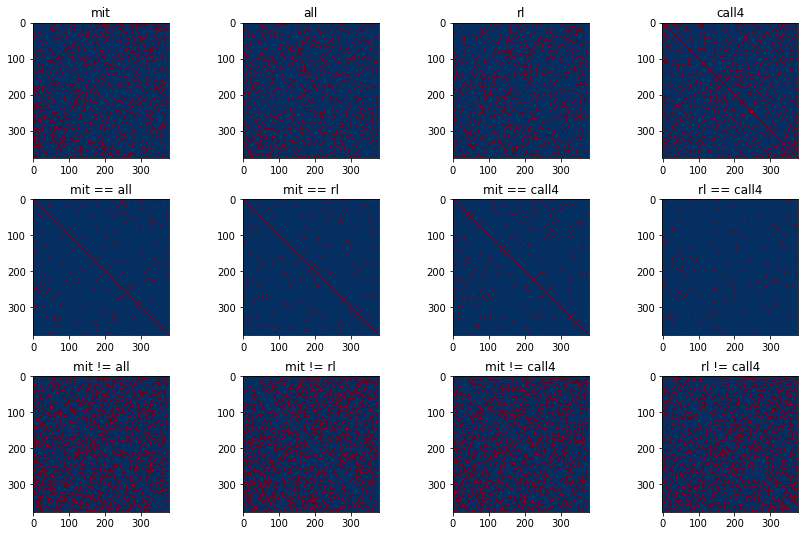

chromosome 1: 5, chromosome 2: 5
file directory: ../data/extracted_all_contact_MIT/chr_05_05_500kb.mat
file directory: ../data/extracted_all_contact_call4/chr_05_05_500kb.mat
file directory: ../data/extracted_all_contact_RL/chr_05_05_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_05_05_500kb.mat
size of old matrix: (362, 362)
size of new matrix: (357, 357)
size of old matrix: (362, 362)
size of new matrix: (357, 357)
size of old matrix: (362, 362)
size of new matrix: (357, 357)
size of old matrix: (362, 362)
size of new matrix: (357, 357)
Number of columnts: 4


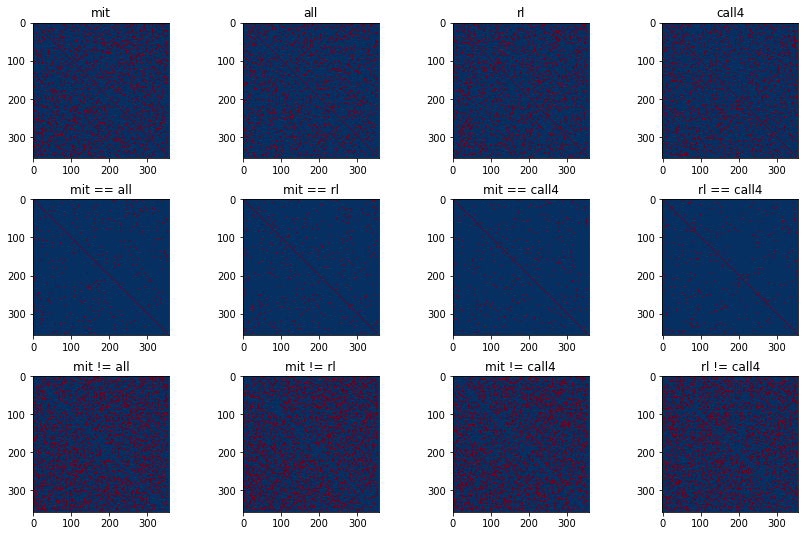

chromosome 1: 6, chromosome 2: 6
file directory: ../data/extracted_all_contact_MIT/chr_06_06_500kb.mat
file directory: ../data/extracted_all_contact_call4/chr_06_06_500kb.mat
file directory: ../data/extracted_all_contact_RL/chr_06_06_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_06_06_500kb.mat
size of old matrix: (342, 342)
size of new matrix: (337, 337)
size of old matrix: (342, 342)
size of new matrix: (337, 337)
size of old matrix: (342, 342)
size of new matrix: (337, 337)
size of old matrix: (342, 342)
size of new matrix: (337, 337)
Number of columnts: 4


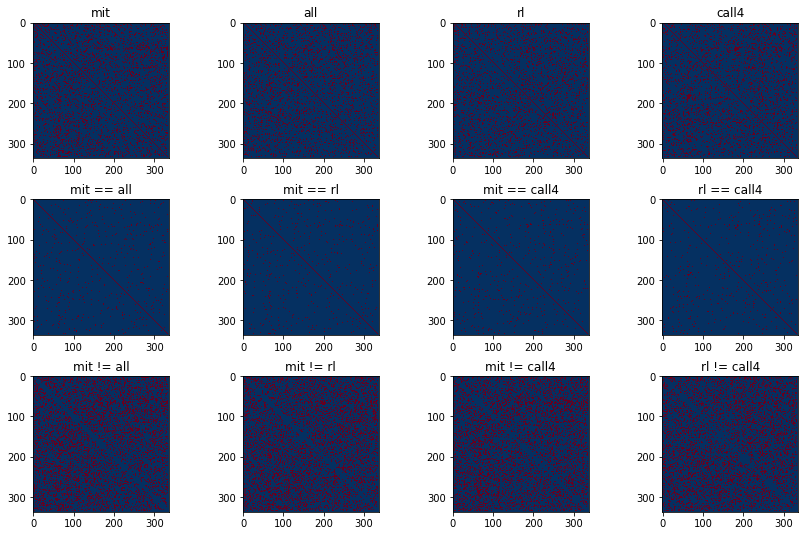

chromosome 1: 7, chromosome 2: 7
file directory: ../data/extracted_all_contact_MIT/chr_07_07_500kb.mat
file directory: ../data/extracted_all_contact_call4/chr_07_07_500kb.mat
file directory: ../data/extracted_all_contact_RL/chr_07_07_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_07_07_500kb.mat
size of old matrix: (318, 318)
size of new matrix: (313, 313)
size of old matrix: (318, 318)
size of new matrix: (313, 313)
size of old matrix: (318, 318)
size of new matrix: (313, 313)
size of old matrix: (318, 318)
size of new matrix: (313, 313)
Number of columnts: 4


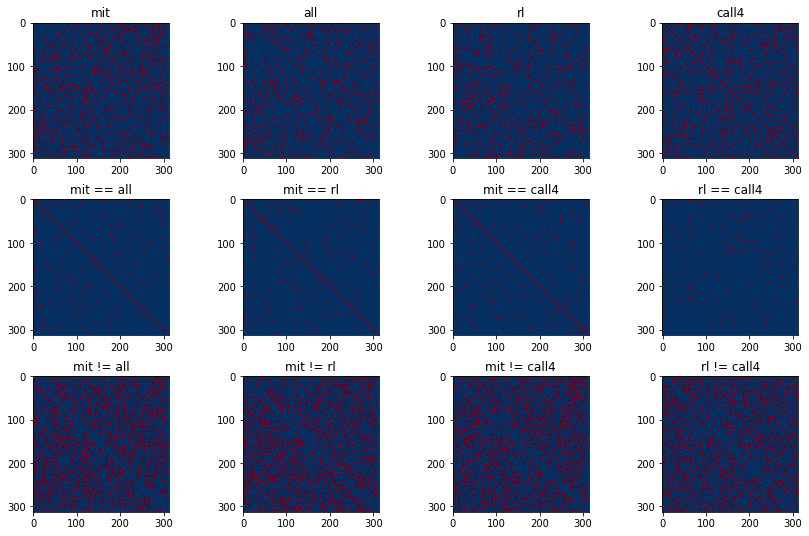

chromosome 1: 8, chromosome 2: 8
file directory: ../data/extracted_all_contact_MIT/chr_08_08_500kb.mat
file directory: ../data/extracted_all_contact_call4/chr_08_08_500kb.mat
file directory: ../data/extracted_all_contact_RL/chr_08_08_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_08_08_500kb.mat
size of old matrix: (293, 293)
size of new matrix: (288, 288)
size of old matrix: (293, 293)
size of new matrix: (288, 288)
size of old matrix: (293, 293)
size of new matrix: (288, 288)
size of old matrix: (293, 293)
size of new matrix: (288, 288)
Number of columnts: 4


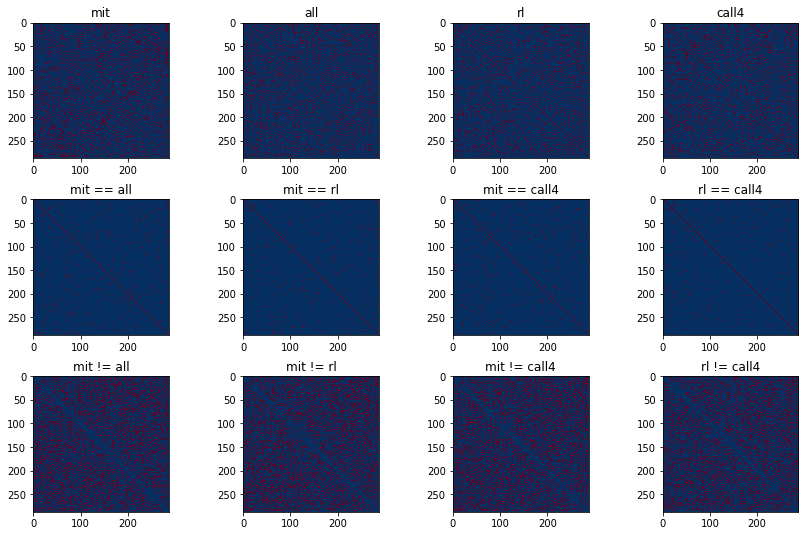

chromosome 1: 9, chromosome 2: 9
file directory: ../data/extracted_all_contact_MIT/chr_09_09_500kb.mat
file directory: ../data/extracted_all_contact_call4/chr_09_09_500kb.mat
file directory: ../data/extracted_all_contact_RL/chr_09_09_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_09_09_500kb.mat
size of old matrix: (281, 281)
size of new matrix: (246, 246)
size of old matrix: (281, 281)
size of new matrix: (246, 246)
size of old matrix: (281, 281)
size of new matrix: (246, 246)
size of old matrix: (281, 281)
size of new matrix: (246, 246)
Number of columnts: 4


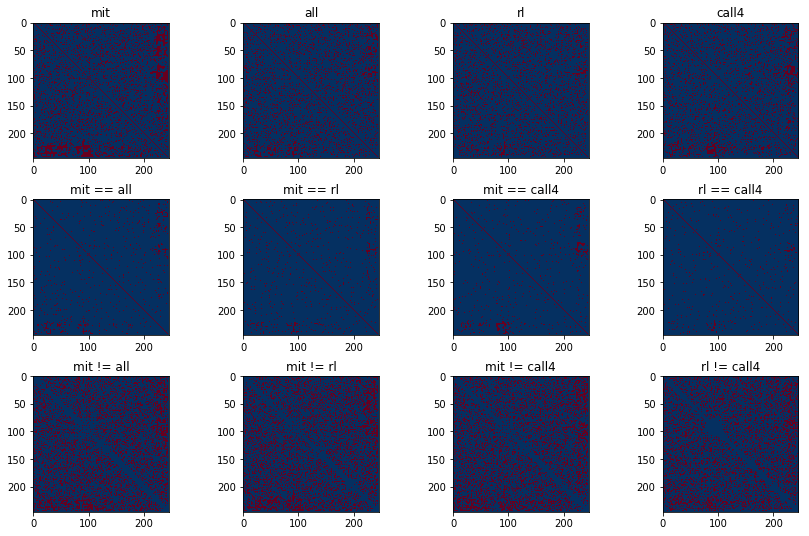

chromosome 1: 10, chromosome 2: 10
file directory: ../data/extracted_all_contact_MIT/chr_10_10_500kb.mat
file directory: ../data/extracted_all_contact_call4/chr_10_10_500kb.mat
file directory: ../data/extracted_all_contact_RL/chr_10_10_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_10_10_500kb.mat
size of old matrix: (271, 271)
size of new matrix: (267, 267)
size of old matrix: (271, 271)
size of new matrix: (267, 267)
size of old matrix: (271, 271)
size of new matrix: (267, 267)
size of old matrix: (271, 271)
size of new matrix: (267, 267)
Number of columnts: 4


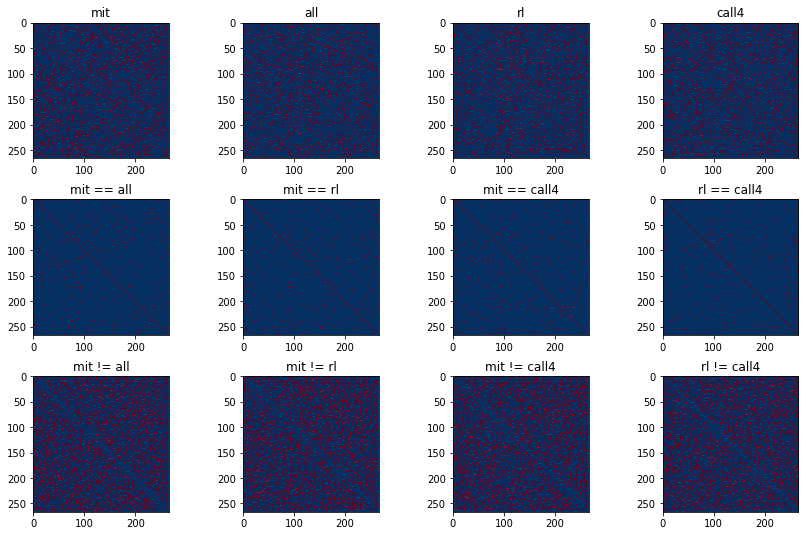

chromosome 1: 11, chromosome 2: 11
file directory: ../data/extracted_all_contact_MIT/chr_11_11_500kb.mat
file directory: ../data/extracted_all_contact_call4/chr_11_11_500kb.mat
file directory: ../data/extracted_all_contact_RL/chr_11_11_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_11_11_500kb.mat
size of old matrix: (269, 269)
size of new matrix: (264, 264)
size of old matrix: (269, 269)
size of new matrix: (264, 264)
size of old matrix: (269, 269)
size of new matrix: (264, 264)
size of old matrix: (269, 269)
size of new matrix: (264, 264)
Number of columnts: 4


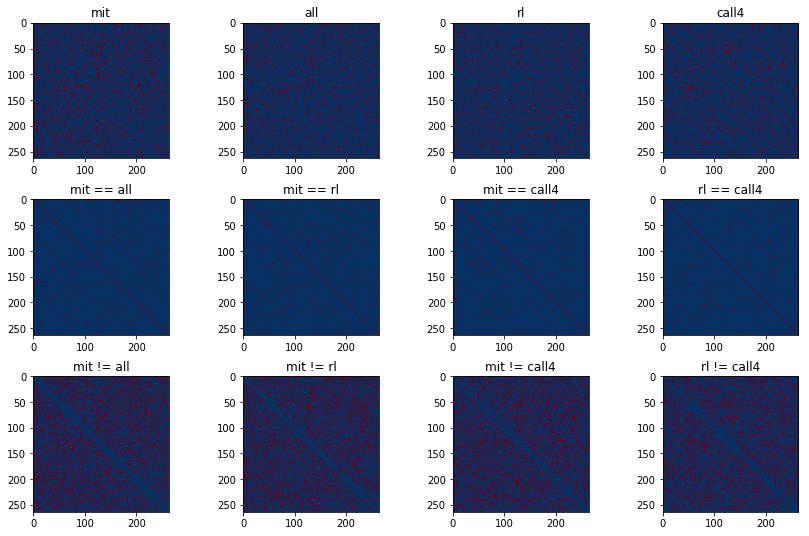

chromosome 1: 12, chromosome 2: 12
file directory: ../data/extracted_all_contact_MIT/chr_12_12_500kb.mat
file directory: ../data/extracted_all_contact_call4/chr_12_12_500kb.mat
file directory: ../data/extracted_all_contact_RL/chr_12_12_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_12_12_500kb.mat
size of old matrix: (265, 265)
size of new matrix: (263, 263)
size of old matrix: (265, 265)
size of new matrix: (263, 263)
size of old matrix: (265, 265)
size of new matrix: (263, 263)
size of old matrix: (265, 265)
size of new matrix: (263, 263)
Number of columnts: 4


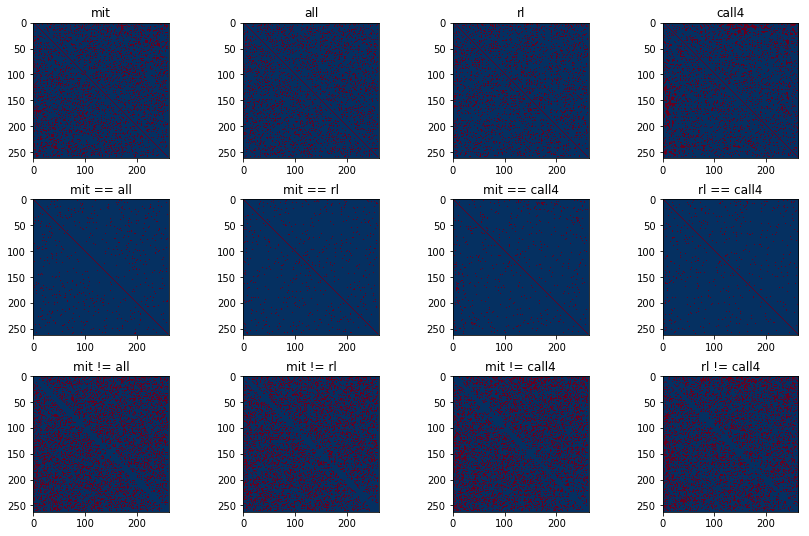

chromosome 1: 13, chromosome 2: 13
file directory: ../data/extracted_all_contact_MIT/chr_13_13_500kb.mat
file directory: ../data/extracted_all_contact_call4/chr_13_13_500kb.mat
file directory: ../data/extracted_all_contact_RL/chr_13_13_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_13_13_500kb.mat
size of old matrix: (229, 229)
size of new matrix: (194, 194)
size of old matrix: (229, 229)
size of new matrix: (194, 194)
size of old matrix: (229, 229)
size of new matrix: (194, 194)
size of old matrix: (229, 229)
size of new matrix: (194, 194)
Number of columnts: 4


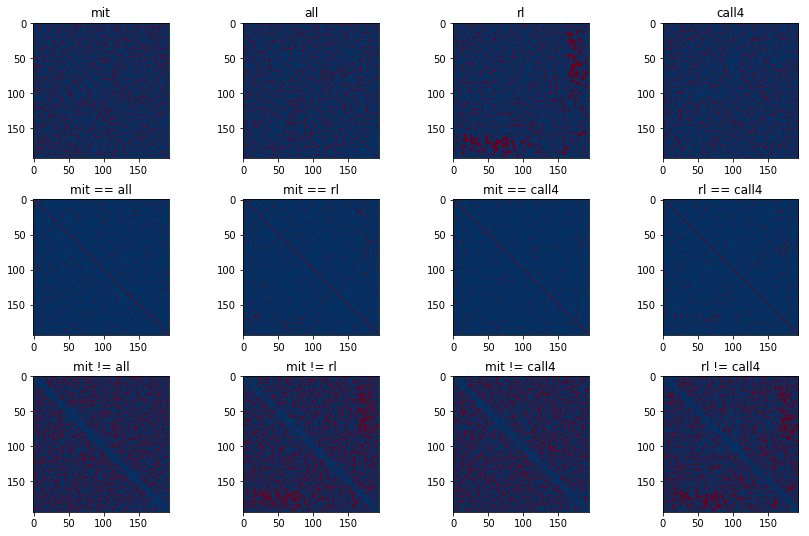

chromosome 1: 14, chromosome 2: 14
file directory: ../data/extracted_all_contact_MIT/chr_14_14_500kb.mat
file directory: ../data/extracted_all_contact_call4/chr_14_14_500kb.mat
file directory: ../data/extracted_all_contact_RL/chr_14_14_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_14_14_500kb.mat
size of old matrix: (213, 213)
size of new matrix: (177, 177)
size of old matrix: (213, 213)
size of new matrix: (177, 177)
size of old matrix: (213, 213)
size of new matrix: (177, 177)
size of old matrix: (213, 213)
size of new matrix: (177, 177)
Number of columnts: 4


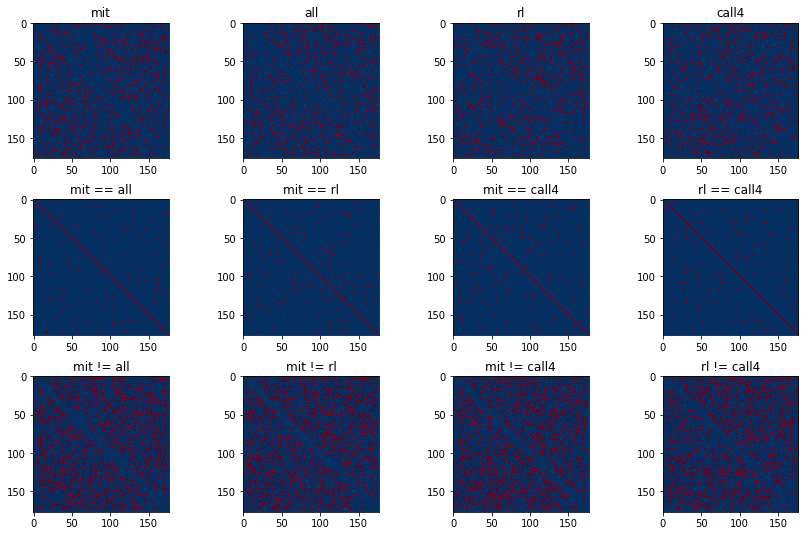

chromosome 1: 15, chromosome 2: 15
file directory: ../data/extracted_all_contact_MIT/chr_15_15_500kb.mat
file directory: ../data/extracted_all_contact_call4/chr_15_15_500kb.mat
file directory: ../data/extracted_all_contact_RL/chr_15_15_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_15_15_500kb.mat
size of old matrix: (201, 201)
size of new matrix: (165, 165)
size of old matrix: (201, 201)
size of new matrix: (165, 165)
size of old matrix: (201, 201)
size of new matrix: (165, 165)
size of old matrix: (201, 201)
size of new matrix: (165, 165)
Number of columnts: 4


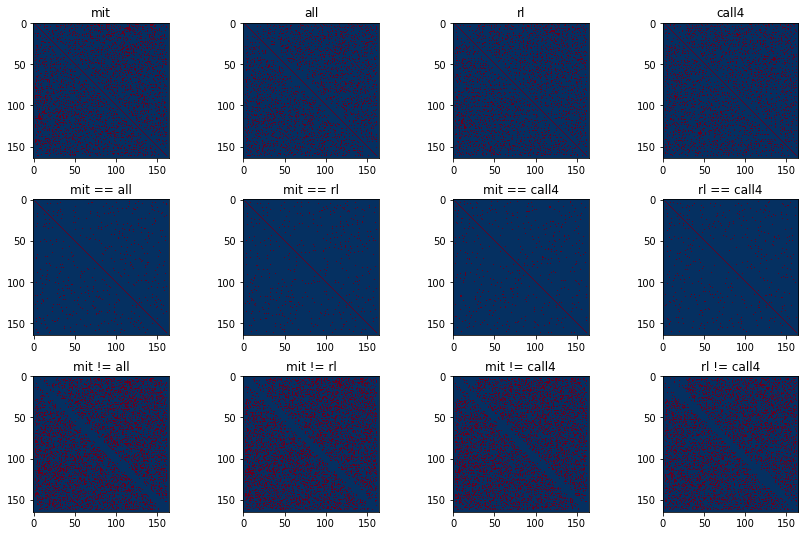

chromosome 1: 16, chromosome 2: 16
file directory: ../data/extracted_all_contact_MIT/chr_16_16_500kb.mat
file directory: ../data/extracted_all_contact_call4/chr_16_16_500kb.mat
file directory: ../data/extracted_all_contact_RL/chr_16_16_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_16_16_500kb.mat
size of old matrix: (178, 178)
size of new matrix: (160, 160)
size of old matrix: (178, 178)
size of new matrix: (160, 160)
size of old matrix: (178, 178)
size of new matrix: (160, 160)
size of old matrix: (178, 178)
size of new matrix: (160, 160)
Number of columnts: 4


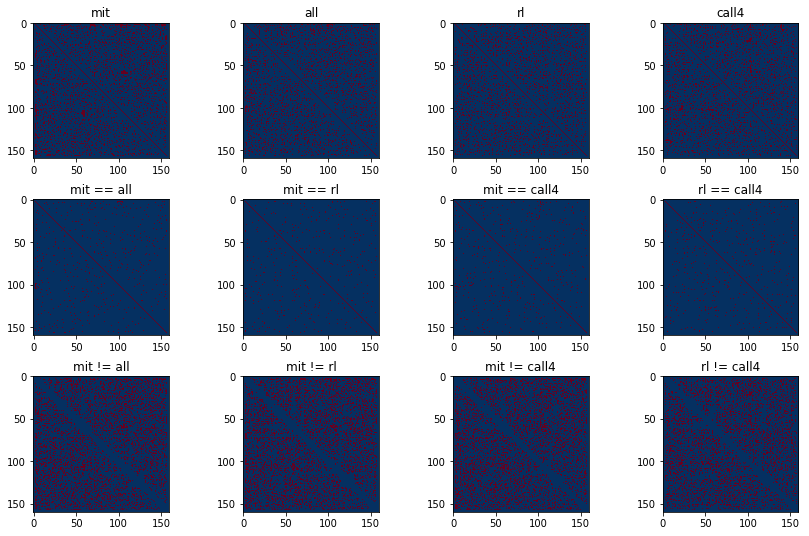

chromosome 1: 17, chromosome 2: 17
file directory: ../data/extracted_all_contact_MIT/chr_17_17_500kb.mat
file directory: ../data/extracted_all_contact_call4/chr_17_17_500kb.mat
file directory: ../data/extracted_all_contact_RL/chr_17_17_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_17_17_500kb.mat
size of old matrix: (158, 158)
size of new matrix: (158, 158)
size of old matrix: (158, 158)
size of new matrix: (158, 158)
size of old matrix: (158, 158)
size of new matrix: (158, 158)
size of old matrix: (158, 158)
size of new matrix: (158, 158)
Number of columnts: 4


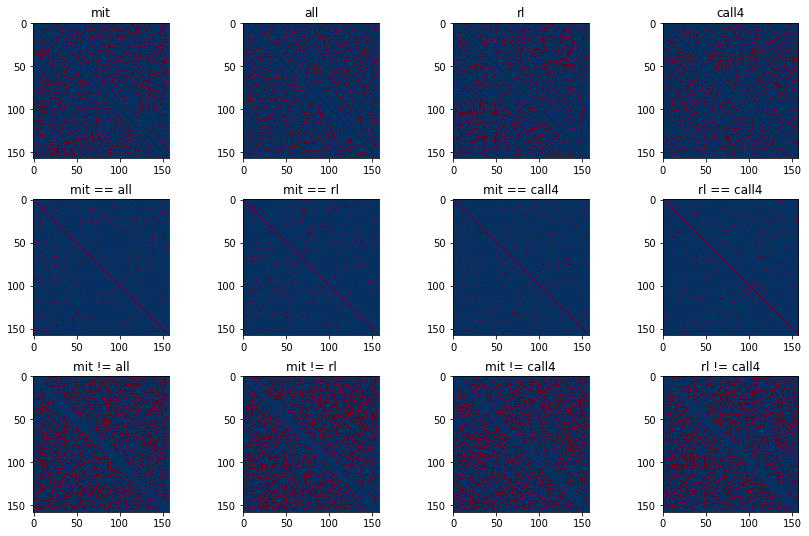

chromosome 1: 18, chromosome 2: 18
file directory: ../data/extracted_all_contact_MIT/chr_18_18_500kb.mat
file directory: ../data/extracted_all_contact_call4/chr_18_18_500kb.mat
file directory: ../data/extracted_all_contact_RL/chr_18_18_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_18_18_500kb.mat
size of old matrix: (153, 153)
size of new matrix: (151, 151)
size of old matrix: (153, 153)
size of new matrix: (151, 151)
size of old matrix: (153, 153)
size of new matrix: (151, 151)
size of old matrix: (153, 153)
size of new matrix: (151, 151)
Number of columnts: 4


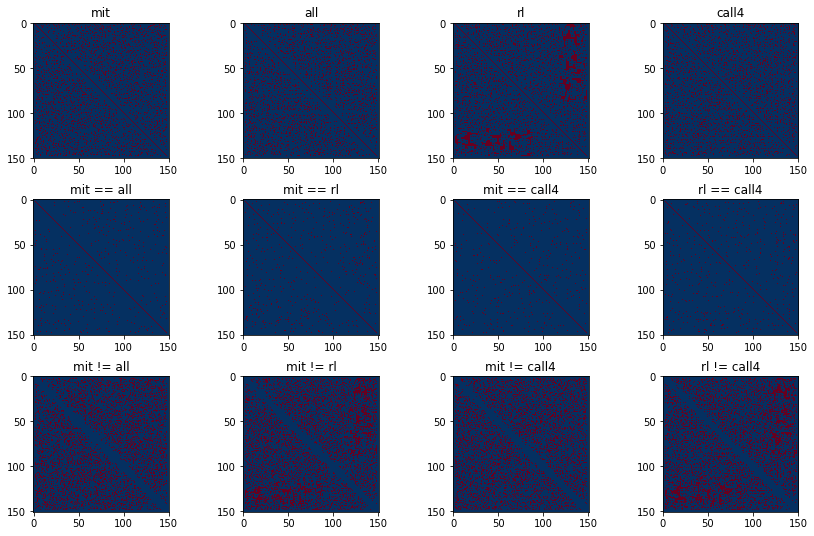

chromosome 1: 19, chromosome 2: 19
file directory: ../data/extracted_all_contact_MIT/chr_19_19_500kb.mat
file directory: ../data/extracted_all_contact_call4/chr_19_19_500kb.mat
file directory: ../data/extracted_all_contact_RL/chr_19_19_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_19_19_500kb.mat
size of old matrix: (128, 128)
size of new matrix: (113, 113)
size of old matrix: (128, 128)
size of new matrix: (113, 113)
size of old matrix: (128, 128)
size of new matrix: (113, 113)
size of old matrix: (128, 128)
size of new matrix: (113, 113)
Number of columnts: 4


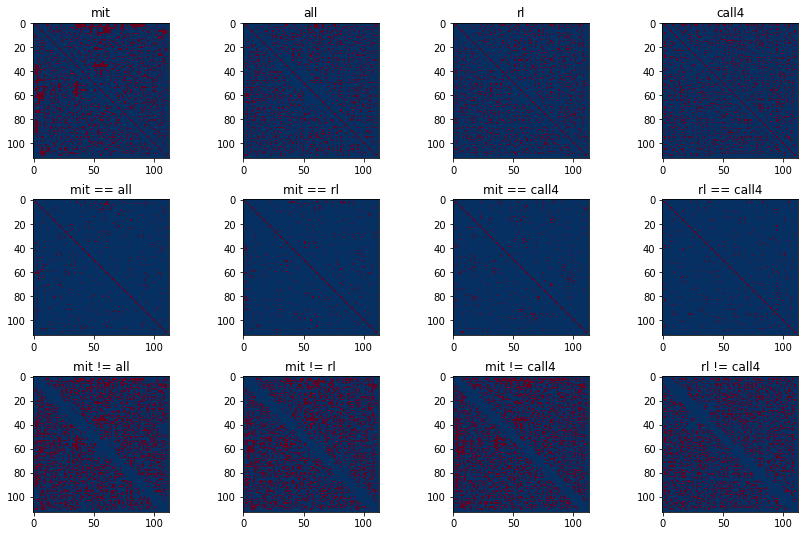

chromosome 1: 20, chromosome 2: 20
file directory: ../data/extracted_all_contact_MIT/chr_20_20_500kb.mat
file directory: ../data/extracted_all_contact_call4/chr_20_20_500kb.mat
file directory: ../data/extracted_all_contact_RL/chr_20_20_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_20_20_500kb.mat
size of old matrix: (125, 125)
size of new matrix: (121, 121)
size of old matrix: (125, 125)
size of new matrix: (121, 121)
size of old matrix: (125, 125)
size of new matrix: (121, 121)
size of old matrix: (125, 125)
size of new matrix: (121, 121)
Number of columnts: 4


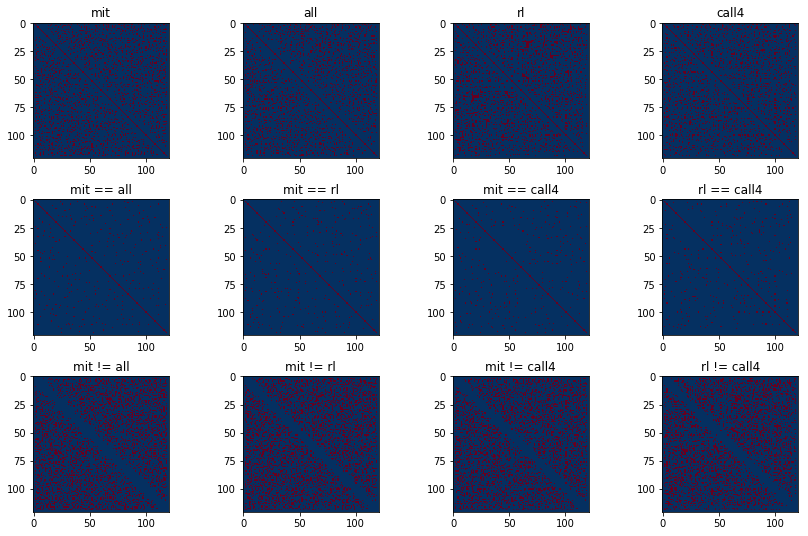

chromosome 1: 21, chromosome 2: 21
file directory: ../data/extracted_all_contact_MIT/chr_21_21_500kb.mat
file directory: ../data/extracted_all_contact_call4/chr_21_21_500kb.mat
file directory: ../data/extracted_all_contact_RL/chr_21_21_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_21_21_500kb.mat
size of old matrix: (94, 94)
size of new matrix: (70, 70)
size of old matrix: (94, 94)
size of new matrix: (70, 70)
size of old matrix: (94, 94)
size of new matrix: (70, 70)
size of old matrix: (94, 94)
size of new matrix: (70, 70)
Number of columnts: 4


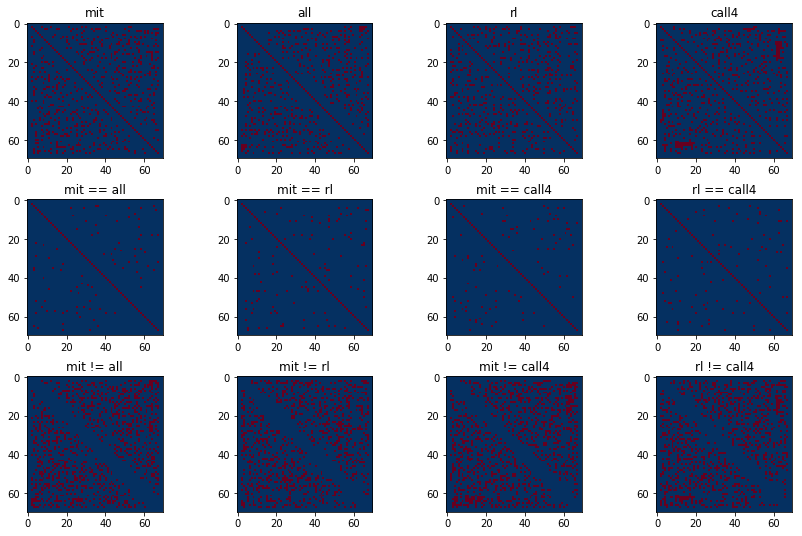

chromosome 1: 22, chromosome 2: 22
file directory: ../data/extracted_all_contact_MIT/chr_22_22_500kb.mat
file directory: ../data/extracted_all_contact_call4/chr_22_22_500kb.mat
file directory: ../data/extracted_all_contact_RL/chr_22_22_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_22_22_500kb.mat
size of old matrix: (100, 100)
size of new matrix: (70, 70)
size of old matrix: (100, 100)
size of new matrix: (70, 70)
size of old matrix: (100, 100)
size of new matrix: (70, 70)
size of old matrix: (100, 100)
size of new matrix: (70, 70)
Number of columnts: 4


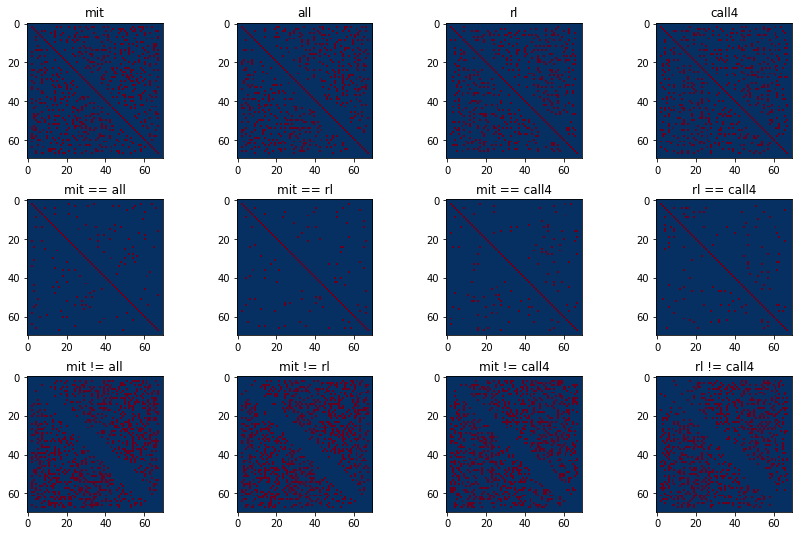

In [51]:
pylab.rcParams['figure.figsize'] = (15, 9)
from thresholding_local import main
main()

In [ ]:
#for chr1 in range(1, 24):
#    os.system('Rscript rscript.r %s'%chr1)